In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df1=pd.read_csv('data_640_validated.csv')

In [ ]:
df1.head()

,Unnamed: 0,п..O1,What is your nationality?,Region: generated from A1.1,What is your biological sex?,What is the highest educational level you have completed,Do you have a pet or a garden at home?,What is your age?,Please specify your ethnicity.,What is your marital status?,...,"In overall, how do you feel about the game? [I felt pressured]","In overall, how do you feel about the game? [I felt irritable]","In overall, how do you feel about the game? [I lost track of time]","In overall, how do you feel about the game? [I felt challenged]","In overall, how do you feel about the game? [I found it impressive]","In overall, how do you feel about the game? [I was deeply concentrated in the game]","In overall, how do you feel about the game? [I felt frustrated]","In overall, how do you feel about the game? [It felt like a rich experience]","In overall, how do you feel about the game? [I lost connection with the outside world]","In overall, how do you feel about the game? [I felt time pressure]"
0,598,5/29/2020 8:11,Filipino,Asia,Male,Secondary school,A pet,11,Asian,"Single, never married",...,1,2,5,4,5,4,1,5,1,1
1,230,5/23/2020 1:54,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",...,1,1,4,2,5,4,2,4,1,4
2,232,5/23/2020 2:01,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",...,1,1,4,1,5,3,2,5,2,4
3,308,5/25/2020 1:34,Filipino,Asia,Female,High school,A pet,13,Asian,"Single, never married",...,3,2,3,4,5,5,2,5,1,2
4,231,5/23/2020 2:00,Mexican American,US/Canada,Male,Secondary school,A pet,14,Hispanic or Latino,"Single, never married",...,5,4,4,3,4,4,1,5,5,5


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 96 columns):
 #   Column                                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                                      --------------  ----- 
 0   Unnamed: 0                                                                                                                                                  640 non-null    int64 
 1   п..O1                                                                                                                                                       640 non-null    object
 2   What is your nationality?                                                                                                                                 

In [ ]:
df1['What is your nationality?'].unique()

array(['Filipino ', 'American', 'Filipino', 'Mexican American ',
       'British ', 'american', 'Vietnamese', 'Vietnam', 'Friendly',
       'canadian', 'Norwegian', 'New Zealander', 'German', 'Singaporean',
       'British', 'USA', 'U.S.', 'White British ', 'Polish-American',
       'Australian', 'American ', 'White', 'Canadian', 'Scottish',
       'Citizen of the United States', 'Viet nam', 'Portuguese-Canadian',
       'United States', 'us', 'white', 'Mixed',
       'British / Filipino, I am a dual citizen ', 'Vietnamese-American',
       'America', 'White British', 'Welsh, British', 'White English ',
       'British - White ', 'South Korean', 'Italian', 'Anerican',
       'Cornish', 'Hispanic ', 'Myanmar', 'North American', 'China',
       ' American', 'Viet Nam', 'usa', 'Asian',
       'German, Native American ', 'Vieynam', 'Chinese', 'indonesian',
       'American (United States of America) ', 'Caucasian ',
       'American (United States)', 'American (U.S.A.)', 'US Citizen',
    

In [ ]:

df1['What is your nationality?'] = df1['What is your nationality?'].str.strip().str.title()

# Standardize country names
country_mapping = {
    'Usa': 'United States',
    'U.S.': 'United States',
    'The United States': 'United States',
    'American':'United States',
    'American (US)': 'United States',
    'American (USA)':'United States',
    'United States of American': 'United States',
    'US citizen':'United States',
    'White American ': 'United States',
    'United States ':'United States',
    'usa':'United States',
    'United States of America':'United States',
    'American (United States of America) ':'United States',
    'American (United States)':'United States',
    'American (U.S.A.)':'United States',
    'American':'United States',
    'american':'United States',
    'USA':'United States',
    'U.S.':'United States',
    'Citizen of the United States':'United States',
    'us':'United States',
    'Vietnam':'Vietnamese',
    'canadian':'Canadian',
    'White British': 'British',
    'Viet nam':'Vietnamese',
    'British / Filipino, I am a dual citizen ': 'Mixed',
    'White English ': 'British',
    'British - White ':'British',
    'Anerican': 'United States',
    'Viet Nam': 'Vietnamese',
    'German, Native American ': 'Mixed',
    'Vieynam': 'Vietnamese',
    'English':'British',
    'Mixed nationalities':'Mixed',
    'FILIPINO':'Filipino',
    'filipino':'Filipino',
    'Filipino-American': 'Mixed',
    'American (Usa)':'United States',
    'White':'British',
    'Citizen Of The United States':'United States',
    'Us':'United States',
    'British / Filipino, I Am A Dual Citizen':'Mixed',
    'America':'United States',
    'White English':'British',
    'British - White':'British',
    'China':'Chinese',
    'American (United States Of America)':'United States',
    'Us Citizen':'United States',
    'Indonesia':'Indonesian',
    'United States Of America':'United States',
    'Uk':'British',
    'British/English':'British',
    'American (Usa)':'United States',
    'American (Us)':'United States',
    'United States Of American':'United States',
    'Philippines':'Filipino',
    'Mexican American':'Mixed',
    'Polish-American':'Mixed',
    'Portuguese-Canadian':'Mixed',
    'Vietnamese-American':'Mixed',
    'British/Filipino':'Mixed',
    'German, Native American':'Mixed',
    'Filipino American':'Mixed',
    'African American':'Mixed',
    'Mixed Race':'Mixed',
    'Ashenkazi Jewish':'Mixed',
    'Korean/ American':'Mixed',
    'Mixed Nationalities':'Mixed',
    'White American':'United States',
    'English, Irish, German':'Mixed',
    'Welsh, British':'Mixed',
    'New Zealand European':'Mixed',
    'Cornish':'British',
    'Autsralian':'Australian',
    'Candadian':'Canadian'
}

df1['What is your nationality?'] = df1['What is your nationality?'].replace(country_mapping)

# Display unique values after cleaning
print(df1['What is your nationality?'].unique())

#TO REMOVE CAUCASIAN, FRIENDLY, 29,

['Filipino' 'United States' 'Mixed' 'British' 'Vietnamese' 'Friendly'
 'Canadian' 'Norwegian' 'New Zealander' 'German' 'Singaporean'
 'Australian' 'Scottish' 'South Korean' 'Italian' 'Hispanic' 'Myanmar'
 'North American' 'Chinese' 'Asian' 'Indonesian' 'Caucasian' 'French'
 'Catalan (Spanish)' 'Japanese' 'Welsh' 'Latina' 'Hong Kong' 'Taiwan'
 'Colombian' 'Dutch' 'Singapore' 'Argentina' '29' 'Irish' 'Icelandic']


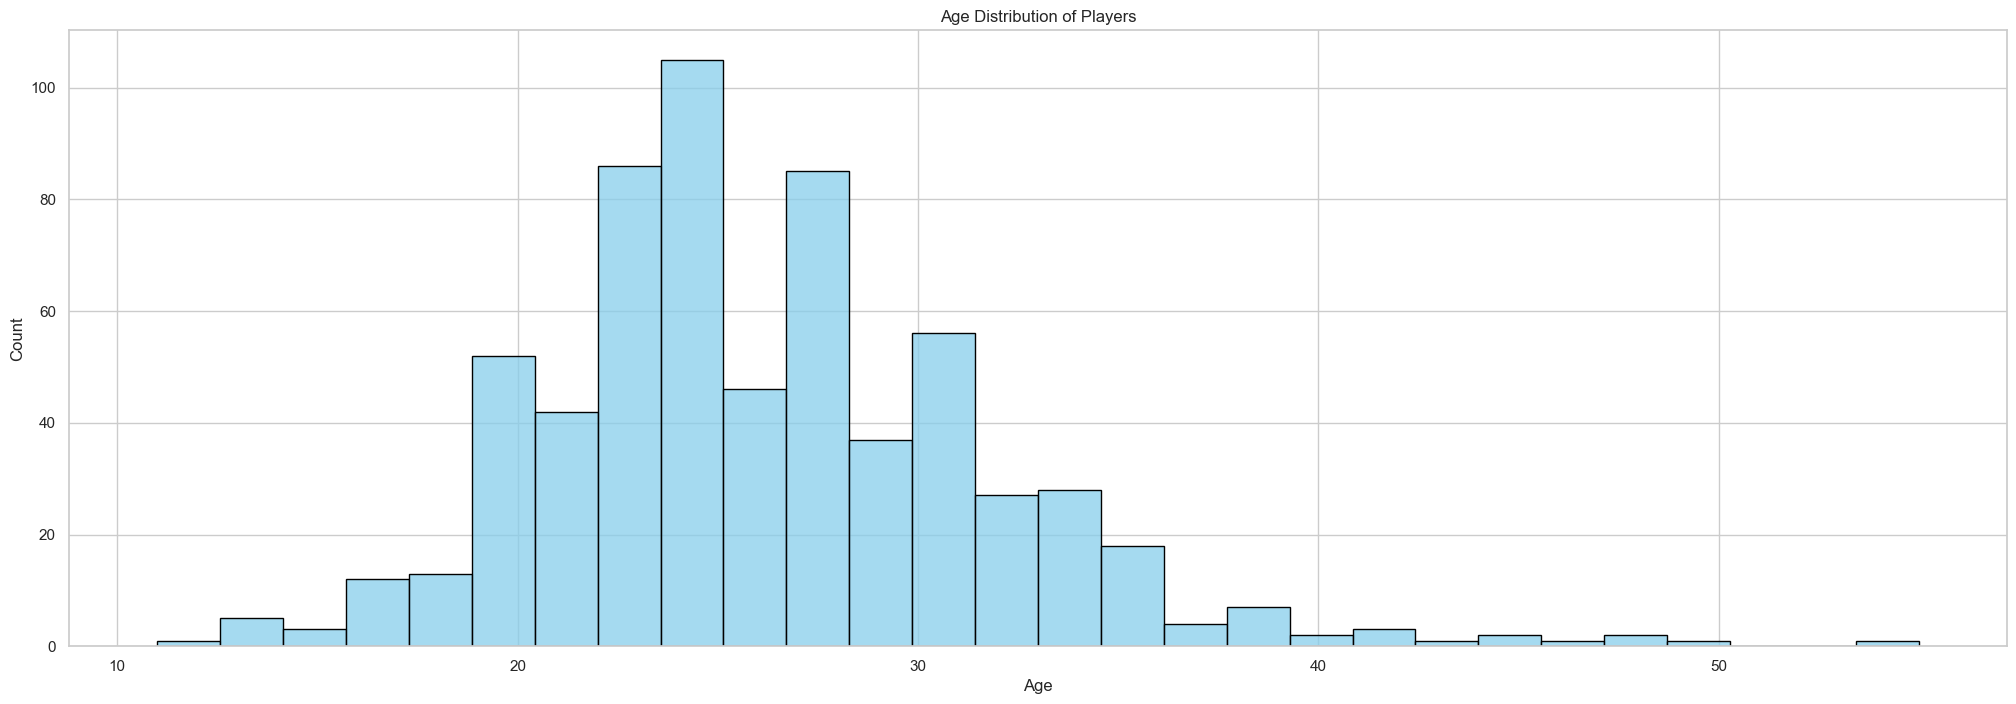

In [ ]:
#DISTRIBUTION OF AGE OF PLAYERS


sns.set(style="whitegrid")

plt.figure(figsize=(25, 8))
sns.histplot(df1['What is your age?'], kde=False, color='skyblue', edgecolor='black')

plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

In [ ]:
df1['What is your age?'].unique()

array([11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46,
       48, 49, 55])

In [ ]:
filtered_df = df1[(df1['What is your age?'] == 'sub 28') | (df1['What is your age?'] == '30s')]
display(filtered_df)

,Unnamed: 0,п..O1,What is your nationality?,Region: generated from A1.1,What is your biological sex?,What is the highest educational level you have completed,Do you have a pet or a garden at home?,What is your age?,Please specify your ethnicity.,What is your marital status?,...,"In overall, how do you feel about the game? [I felt pressured]","In overall, how do you feel about the game? [I felt irritable]","In overall, how do you feel about the game? [I lost track of time]","In overall, how do you feel about the game? [I felt challenged]","In overall, how do you feel about the game? [I found it impressive]","In overall, how do you feel about the game? [I was deeply concentrated in the game]","In overall, how do you feel about the game? [I felt frustrated]","In overall, how do you feel about the game? [It felt like a rich experience]","In overall, how do you feel about the game? [I lost connection with the outside world]","In overall, how do you feel about the game? [I felt time pressure]"


In [ ]:
a = sum(range(30,40))/10
print(a)

34.5


In [ ]:
#QUALITY ISSUE IN LAST TWO ROWS AS SEEN IN THE GRAPH ABOVE
#REPLACING THE INCORRECT VALUES WITH CLOSEST VALUE

df1['What is your age?'][638]=35
df1['What is your age?'][639]=28

/var/folders/26/r8nm44_957190kh5trnr83q40000gn/T/ipykernel_1594/4157892247.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['What is your age?'][638]=35
/var/folders/26/r8nm44_957190kh5trnr83q40000gn/T/ipykernel_1594/4157892247.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['What is your age?'][639]=28


The 'sub 28' values in the data do not have a specific value after 'sub', and it's expected that these represent age subtracted from 28, so we will make an assumption or choose a default value for the missing part and we could assume that the missing part is zero.

For the '30s' we are taking the range from 30 to 40 and taking the mean of it as the age assigned to the user where the age is mentioned as '30s'.

In [ ]:
df1['What is your age?']

0      11
1      13
2      13
3      13
4      14
       ..
635    48
636    49
637    55
638    35
639    28
Name: What is your age?, Length: 640, dtype: int64

In [ ]:
#CHANGING DATA TYPE TO NUMERIC FOR GRAPH
df1['What is your age?'] = pd.to_numeric(df1['What is your age?'], errors='coerce')

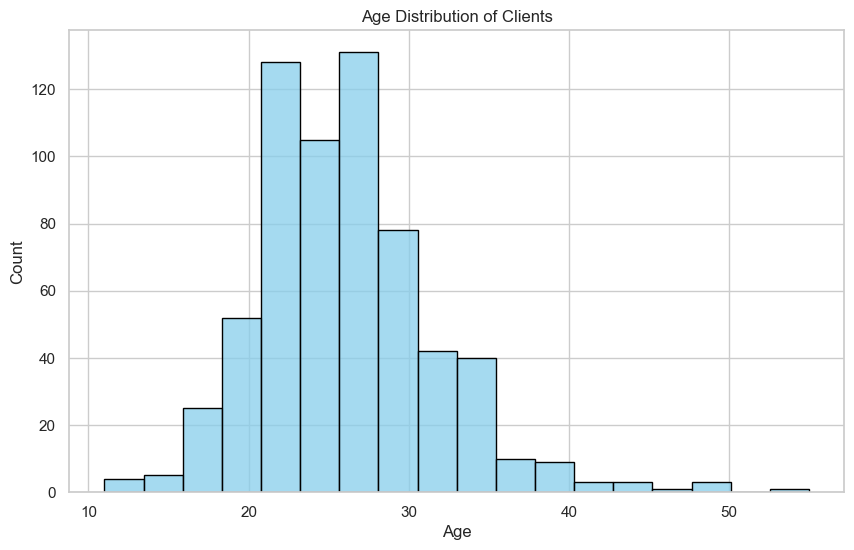

In [ ]:
#PLOTTING DISTRIBUTION AGAIN WITH CORRECT VALUES AND DTYPE

sns.set(style="whitegrid")

#histogram
plt.figure(figsize=(10, 6))
sns.histplot(df1['What is your age?'], bins=18, kde=False, color='skyblue', edgecolor='black')


plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

In [ ]:
#STANDARDISING VALUES IN ENVIRONMENTAL PRECEPTION THAT ARE REVERSE SCALED

columns_to_replace = ['How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]'
                      , 'How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable]'
                      , 'How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.]'
                      ,'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]'
                      , 'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]'
                      , 'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]'
                      , 'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]']
replacement_values = {1: 5, 5: 1, 2:4,4:2}

for column in columns_to_replace:
    df1[column] = df1[column].replace(replacement_values)


In [ ]:
df1[columns_to_replace]

,How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.],How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable],How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.],How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations],How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.],How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.],How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]
0,3,1,2,3,4,5,4
1,2,5,3,5,5,5,3
2,2,4,3,5,5,5,3
3,4,3,1,4,3,5,2
4,4,1,1,4,3,4,2
...,...,...,...,...,...,...,...
635,2,2,2,2,4,4,3
636,3,3,3,4,5,5,3
637,3,3,2,3,5,4,4
638,4,2,4,3,4,4,3


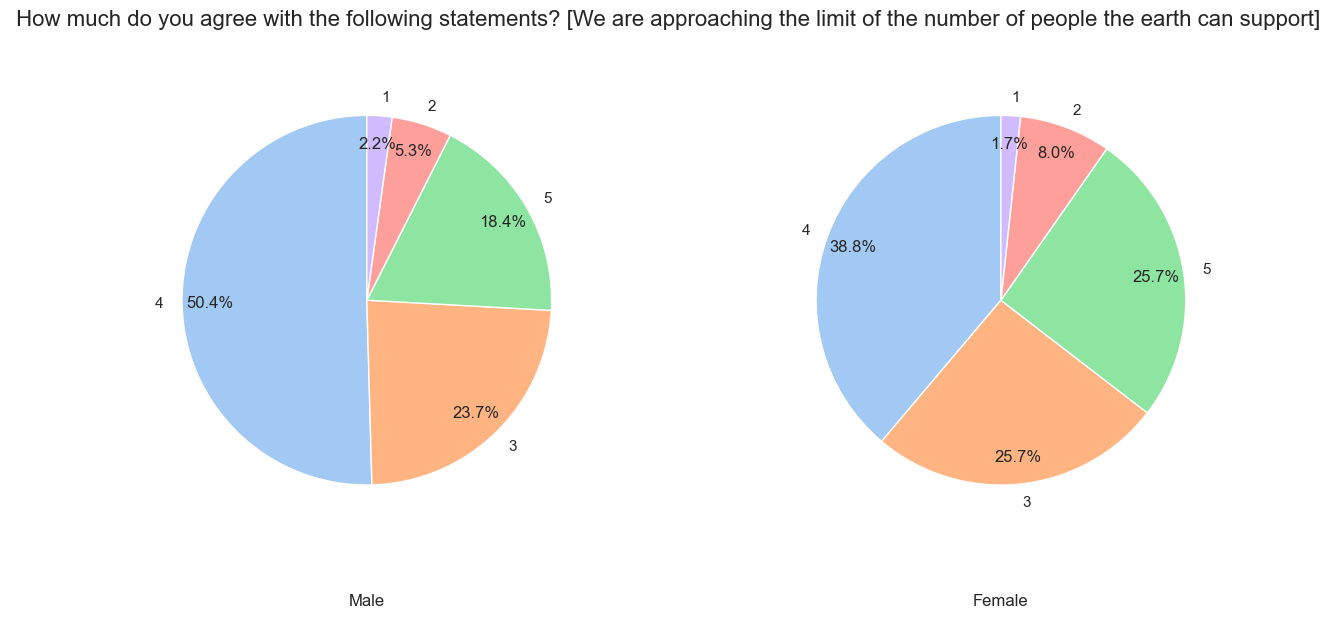

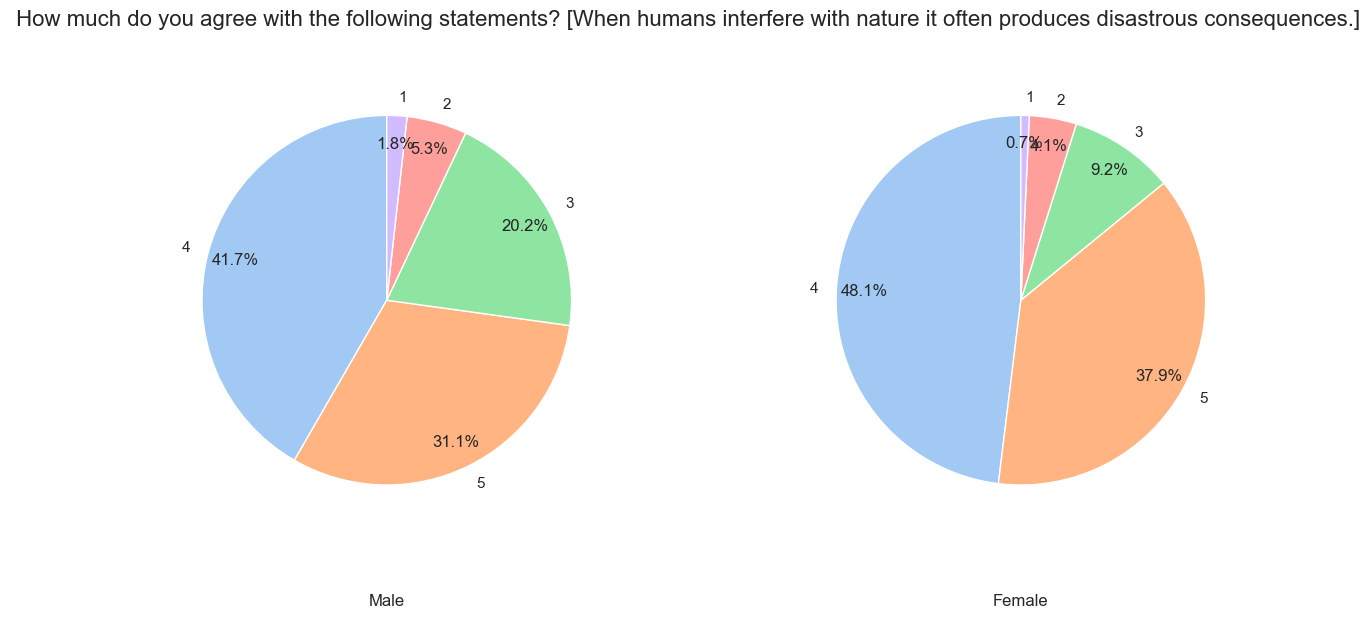

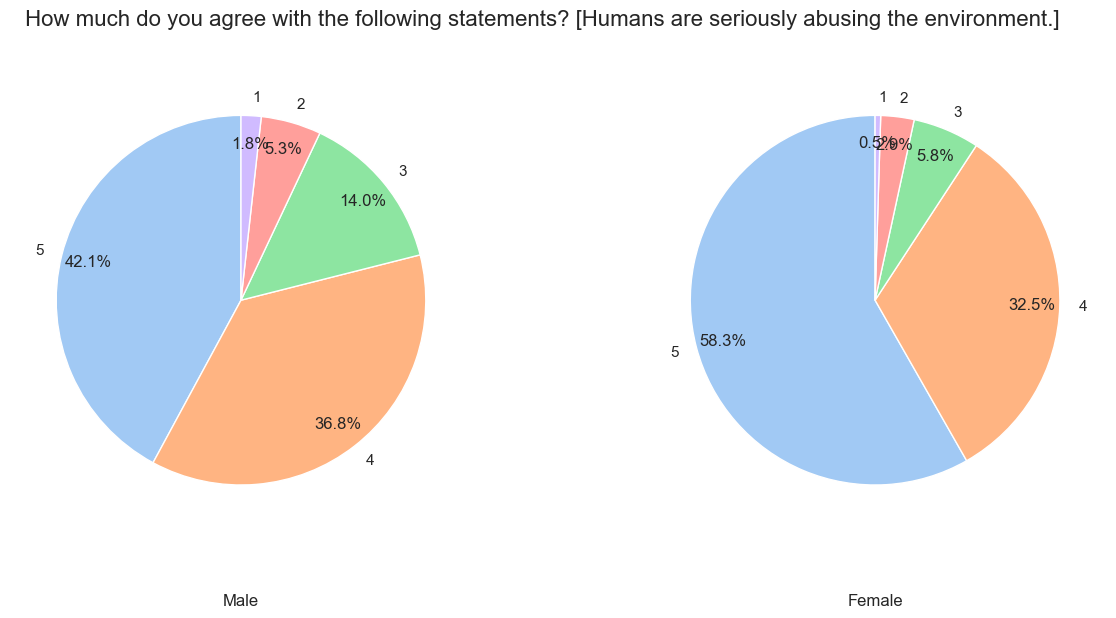

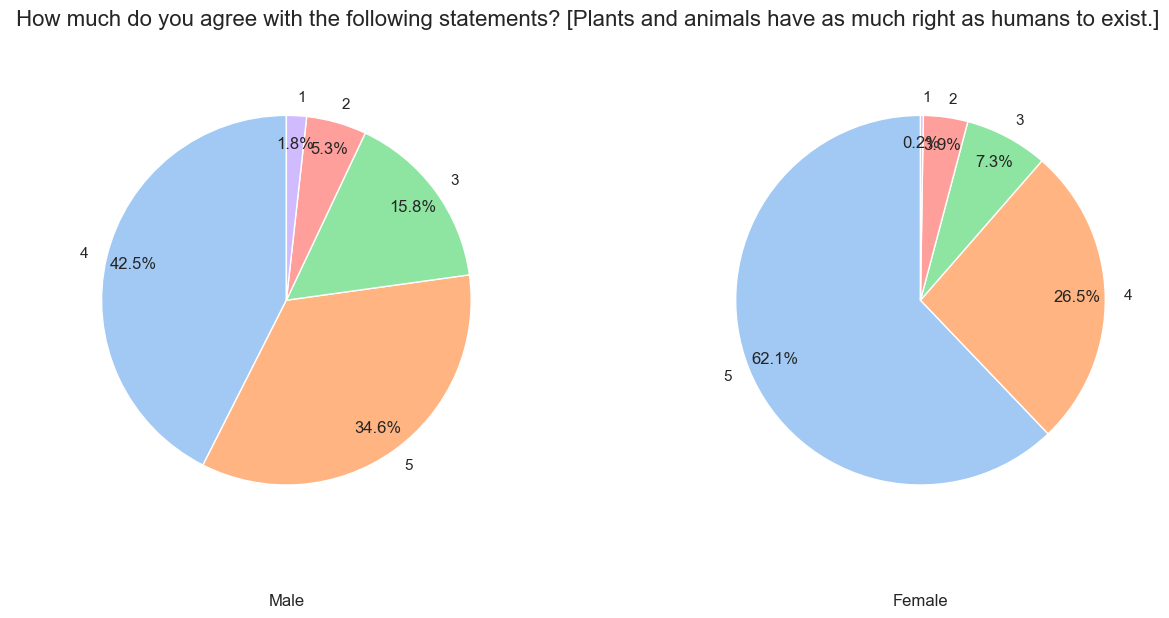

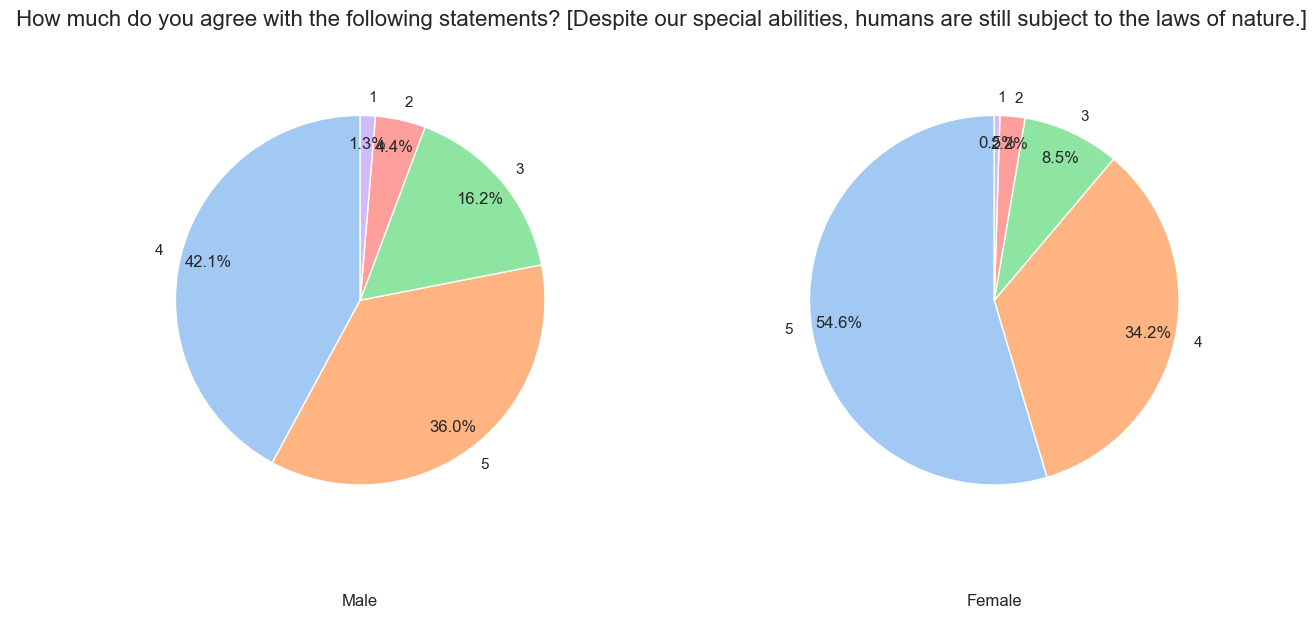

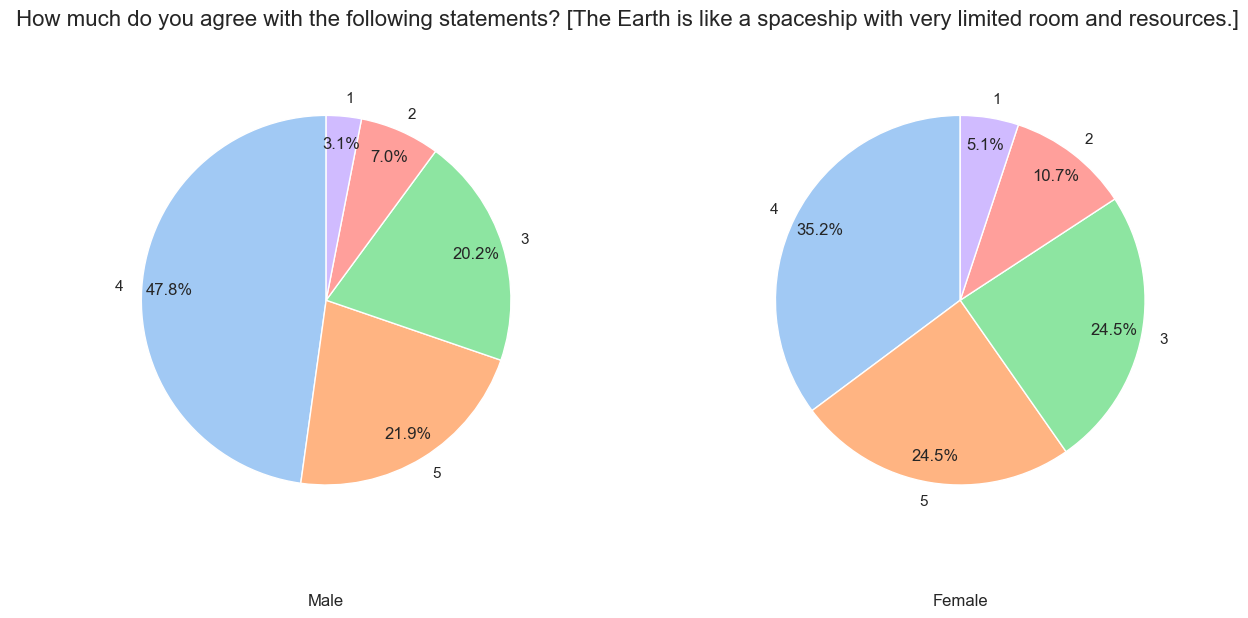

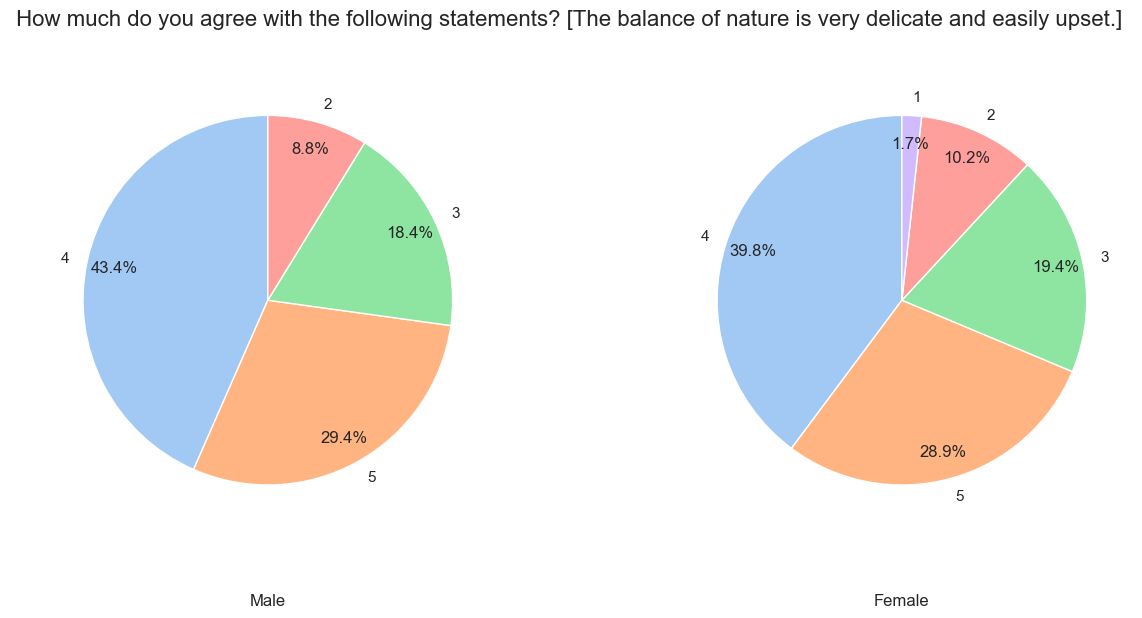

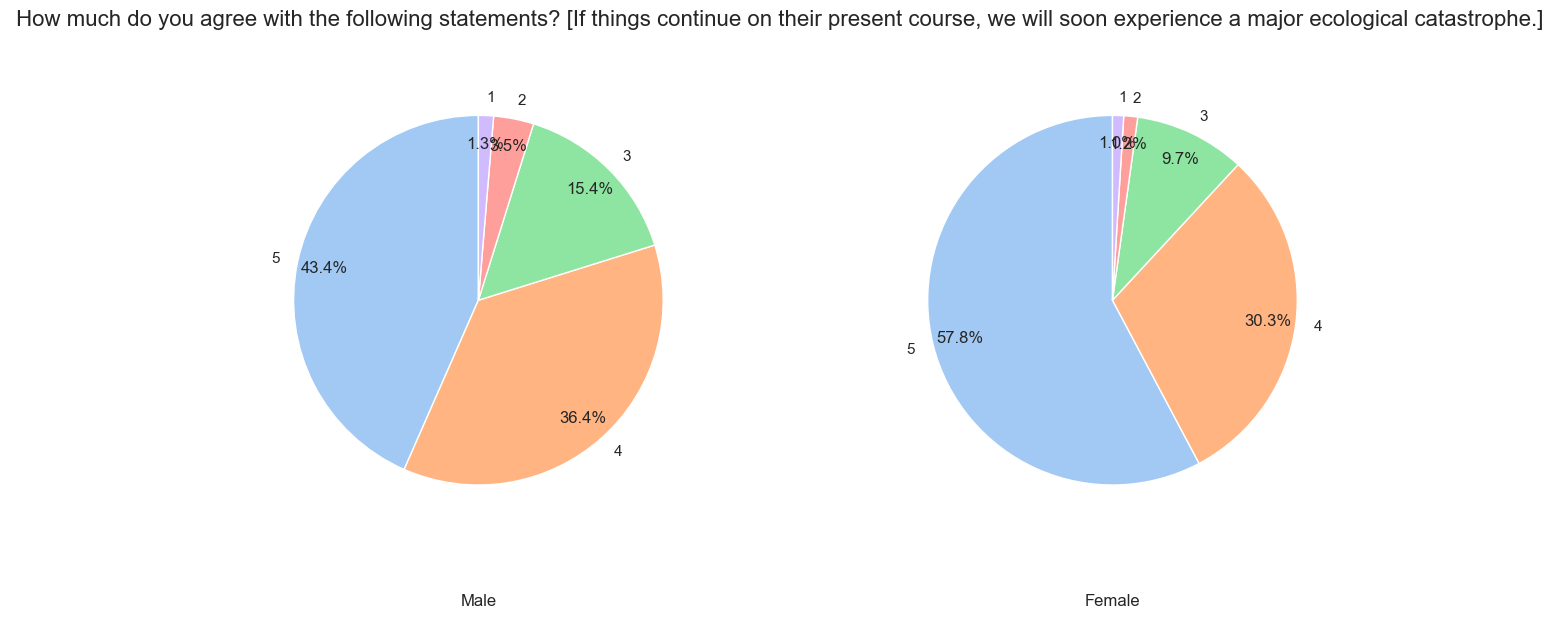

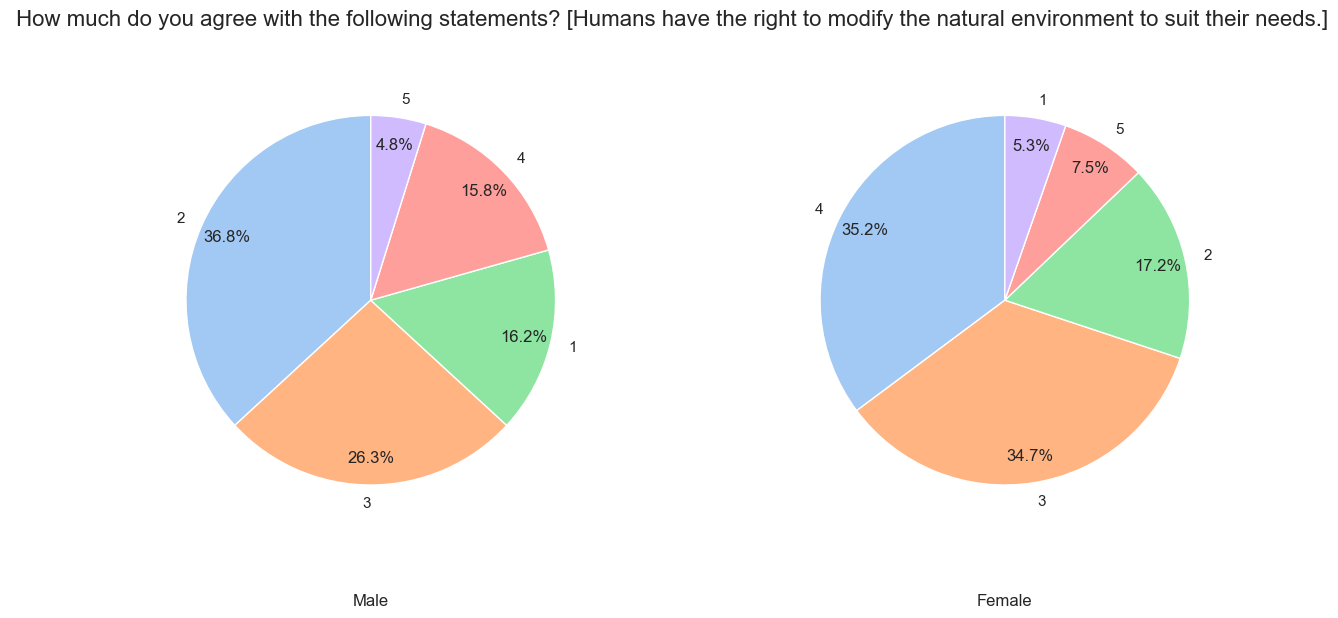

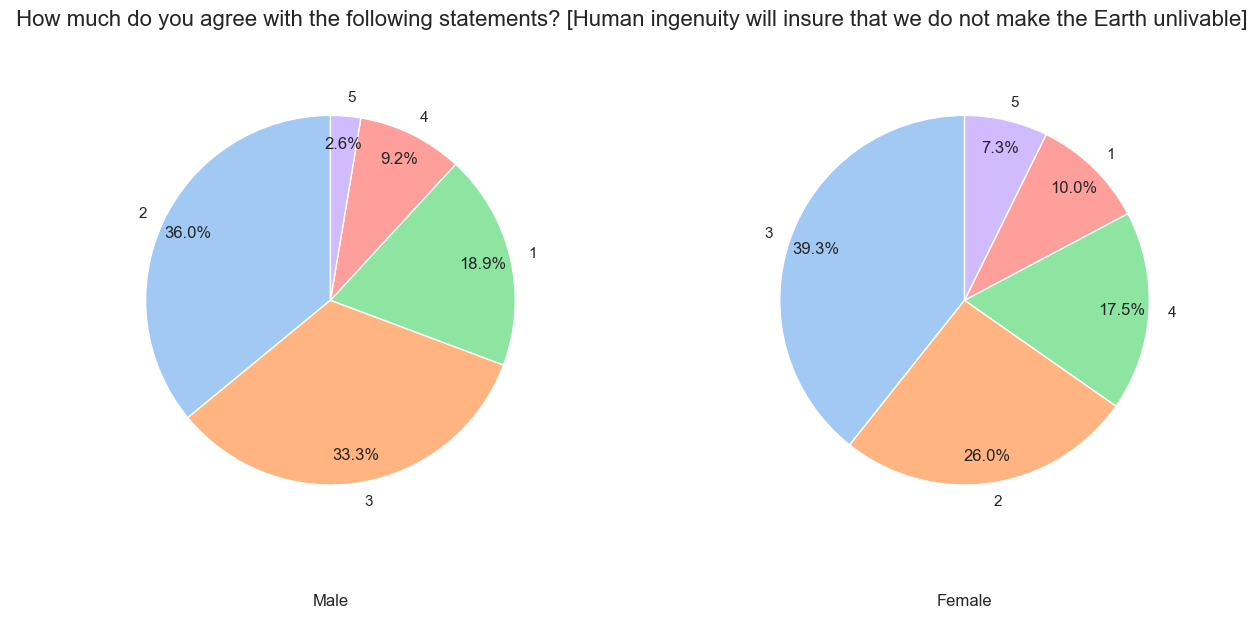

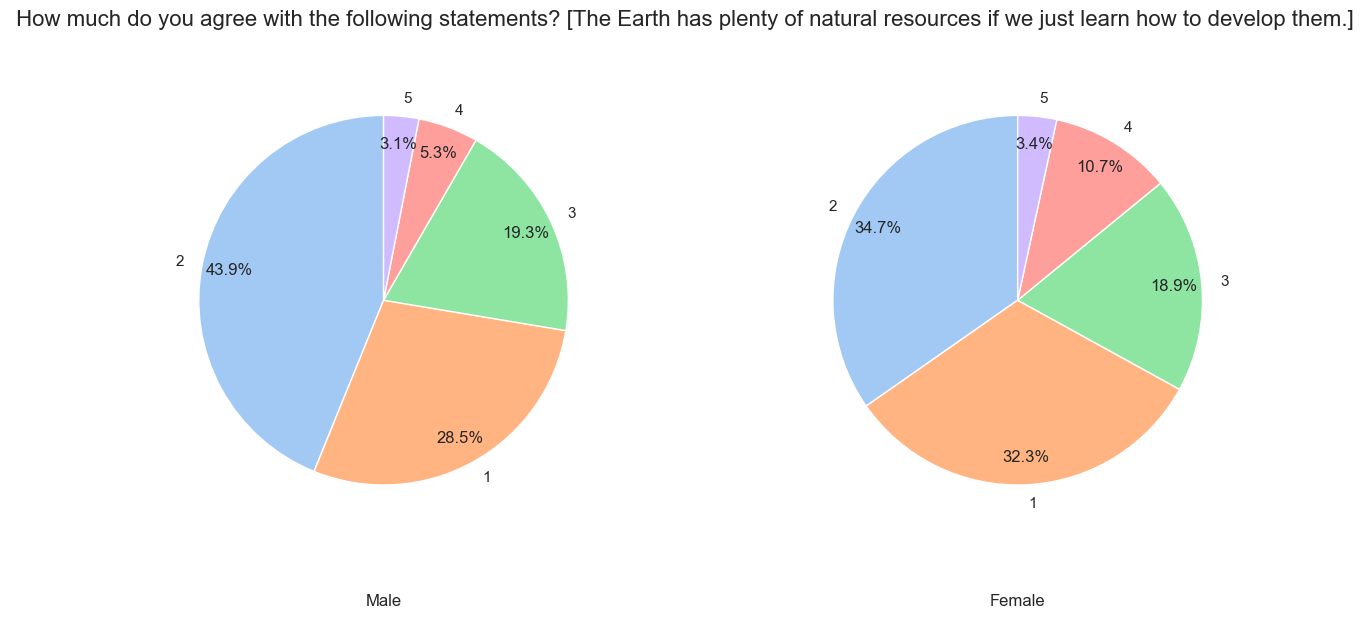

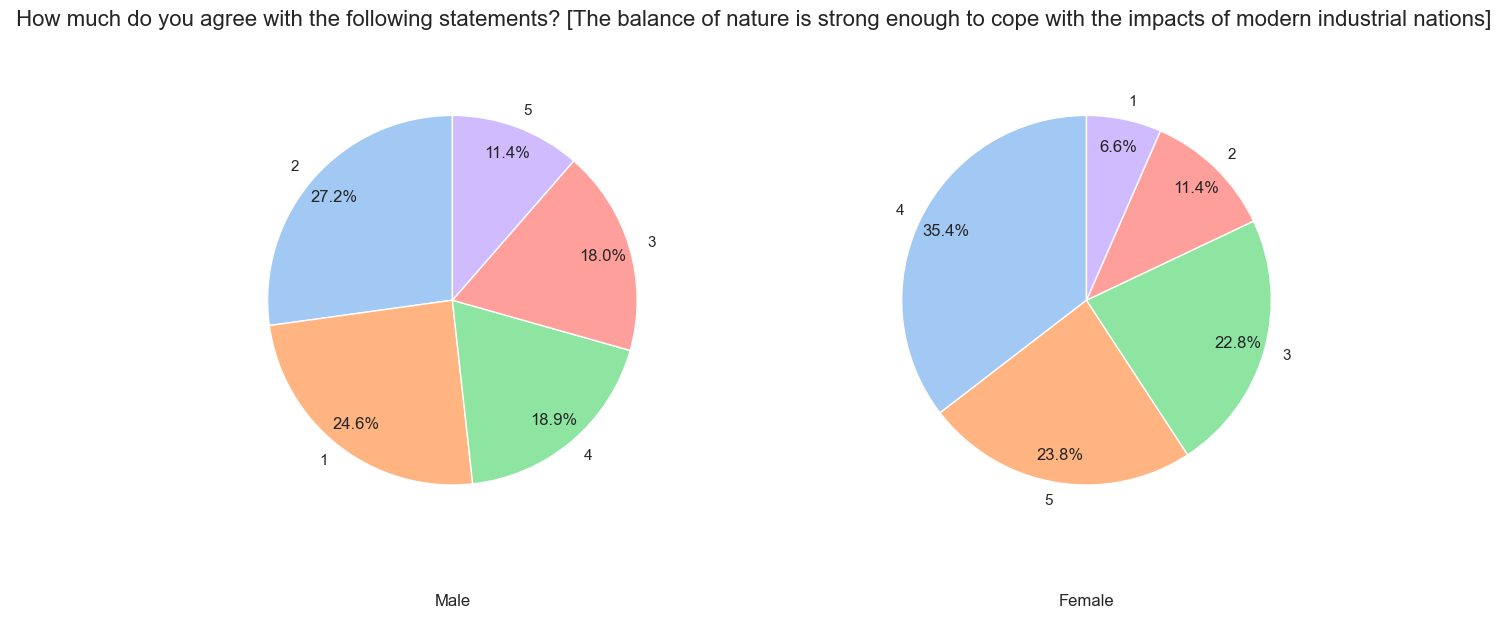

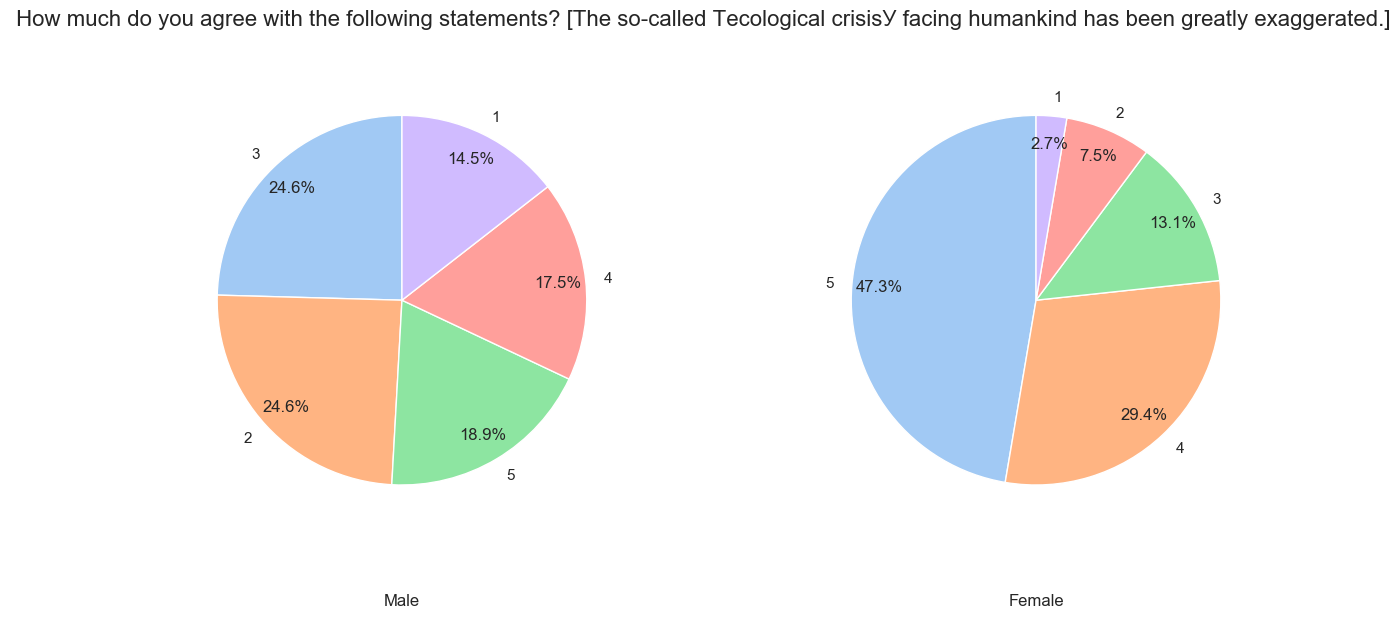

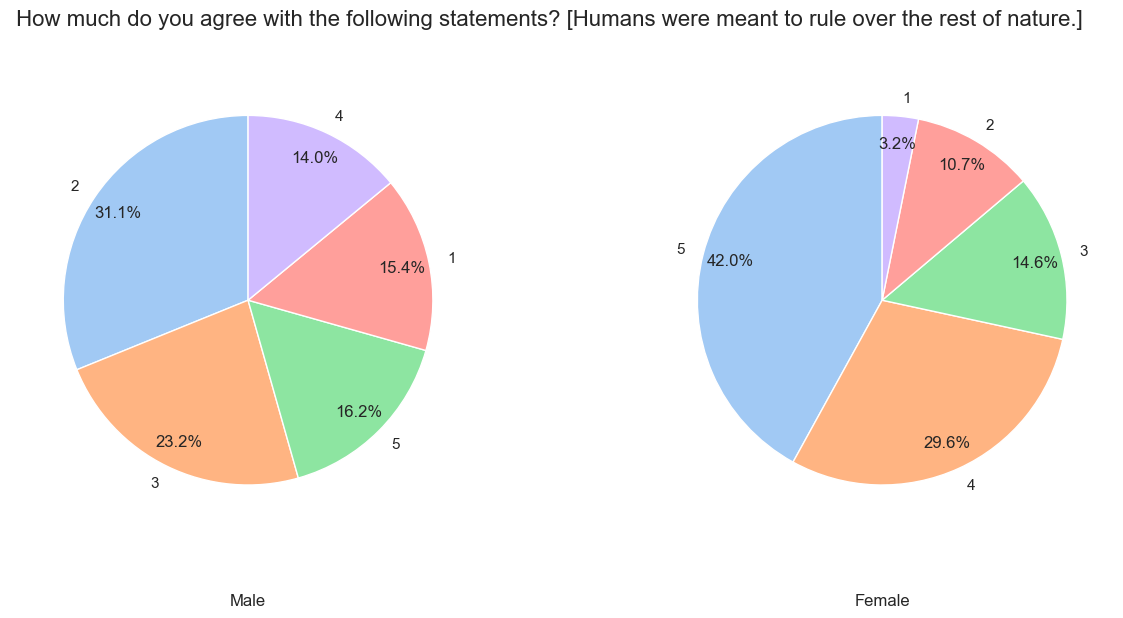

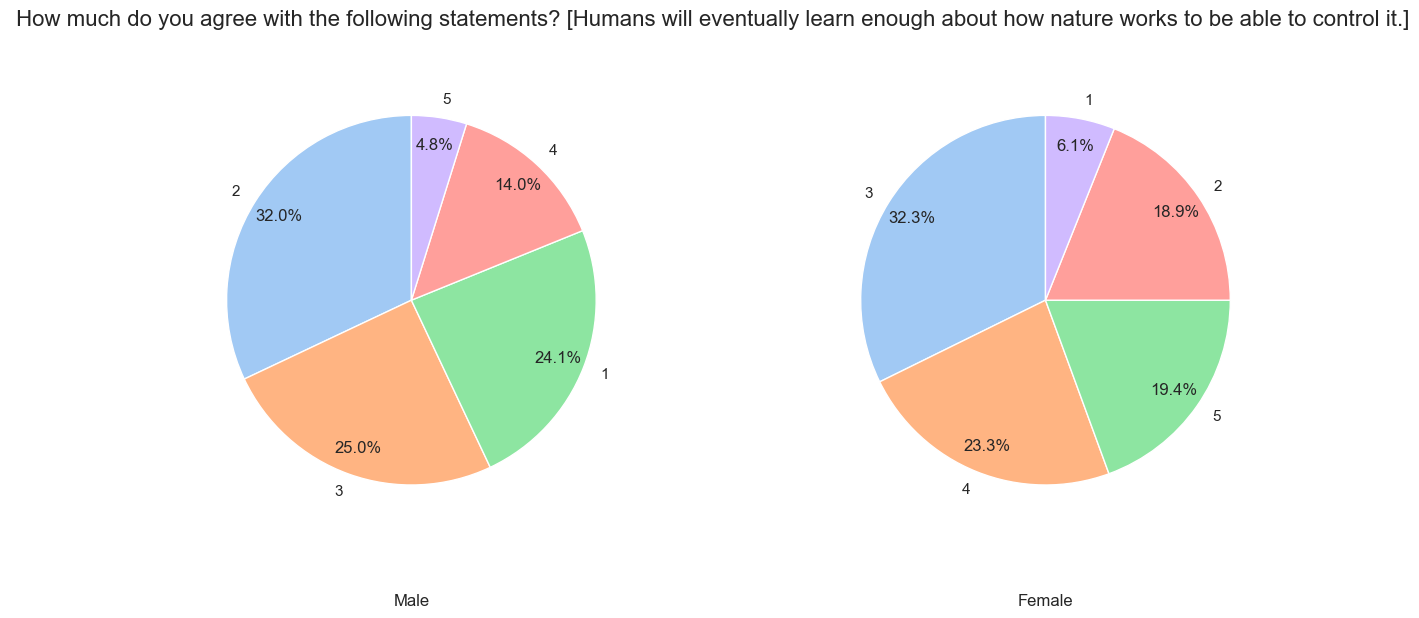

In [ ]:
#RELATIONSHIP BETWEEN GENDER AND ENVIRONMENTAL PERCEPTION

sns.set(style="whitegrid")

# Loop through each question and create pie charts for male and female responses
for question in ['How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support]'
                 ,'How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.]'
                 , 'How much do you agree with the following statements? [Humans are seriously abusing the environment.]'
                 , 'How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]'
                 , 'How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.]'
                 , 'How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.]'
                 ,'How much do you agree with the following statements? [The balance of nature is very delicate and easily upset.]'
                 , 'How much do you agree with the following statements? [If things continue on their present course, we will soon experience a major ecological catastrophe.]'
                 , 'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]'
                      , 'How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable]'
                      , 'How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.]'
                      ,'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]'
                      , 'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]'
                      , 'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]'
                      , 'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]']:

    plt.figure(figsize=(15, 6))

    # Pie chart for Male responses
    plt.subplot(1, 2, 1)
    df_male = df1[df1['What is your biological sex?'] == 'Male']
    male_counts = df_male[question].value_counts()
    plt.pie(male_counts, labels=male_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), pctdistance = 0.85)
    plt.text(0.5, -0.15, 'Male', horizontalalignment='center', verticalalignment='center', fontsize=12, transform=plt.gca().transAxes)

    # Pie chart for Female responses
    plt.subplot(1, 2, 2)
    df_female = df1[df1['What is your biological sex?'] == 'Female']
    female_counts = df_female[question].value_counts()
    plt.pie(female_counts, labels=female_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), pctdistance = 0.85)
    plt.text(0.5, -0.15, 'Female', horizontalalignment='center', verticalalignment='center', fontsize=12, transform=plt.gca().transAxes)
    plt.suptitle(f' {question}', fontsize=16)

    plt.show()

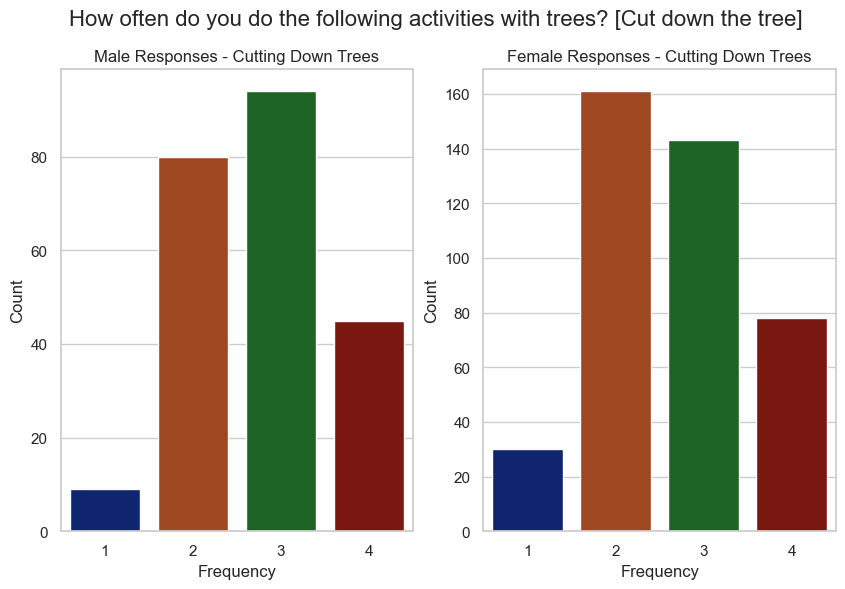

In [ ]:
plt.figure(figsize=(10, 6))

sns.set(style="whitegrid")

# Bar chart for Male responses
plt.subplot(1, 2, 1)
sns.countplot(x='How often do you do the following activities with trees? [Cut down the tree]', data=df1[df1['What is your biological sex?'] == 'Male'], palette='dark')
plt.title('Male Responses - Cutting Down Trees')
plt.xlabel('Frequency')
plt.ylabel('Count')

# Bar chart for Female responses
plt.subplot(1, 2, 2)
sns.countplot(x='How often do you do the following activities with trees? [Cut down the tree]', data=df1[df1['What is your biological sex?'] == 'Female'], palette='dark')
plt.title('Female Responses - Cutting Down Trees')
plt.xlabel('Frequency')
plt.ylabel('Count')


plt.suptitle('How often do you do the following activities with trees? [Cut down the tree]', fontsize=16)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

/var/folders/26/r8nm44_957190kh5trnr83q40000gn/T/ipykernel_1594/35593223.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_demo_features[column] = label_encoder.fit_transform(socio_demo_features[column])
/var/folders/26/r8nm44_957190kh5trnr83q40000gn/T/ipykernel_1594/35593223.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_demo_features[column] = label_encoder.fit_transform(socio_demo_features[column])
/var/folders/26/r8nm44_957190kh5trnr83q40000gn/T/ipykernel_1594/35593223.py:40: Settin

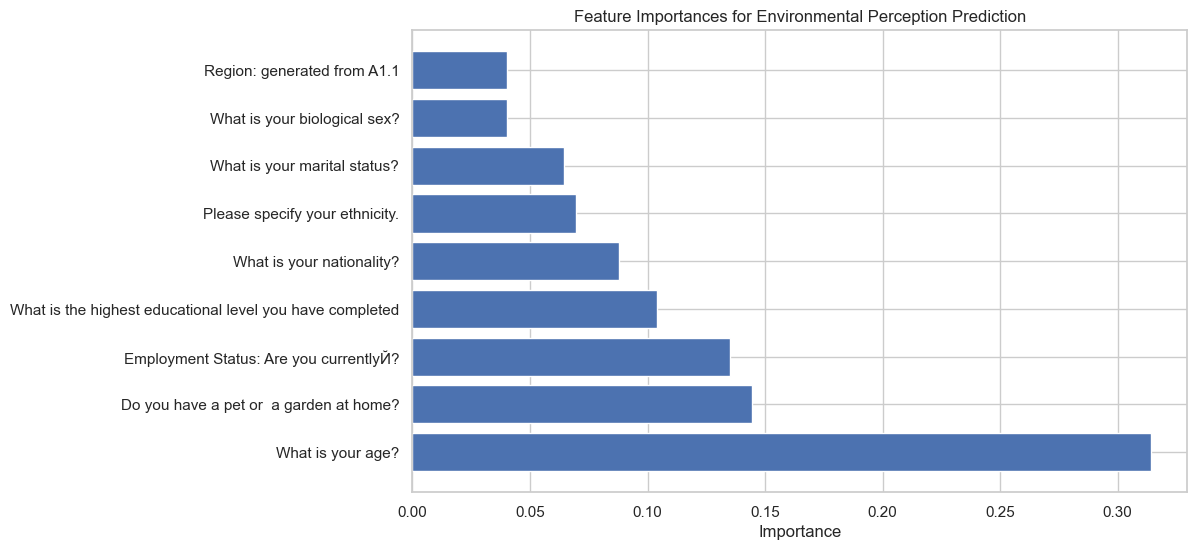

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Select socio-demographic features and environmental perception variables
socio_demo_features = df1[['What is your nationality?',
       'Region: generated from A1.1', 'What is your biological sex?',
       'What is the highest educational level you have completed',
       'Do you have a pet or  a garden at home?', 'What is your age?',
       'Please specify your ethnicity.', 'What is your marital status?',
       'Employment Status: Are you currentlyЙ?']]

environmental_perception = df1[['How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support]'
                 ,'How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.]'
                 , 'How much do you agree with the following statements? [Humans are seriously abusing the environment.]'
                 , 'How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]'
                 , 'How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.]'
                 , 'How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.]'
                 ,'How much do you agree with the following statements? [The balance of nature is very delicate and easily upset.]'
                 , 'How much do you agree with the following statements? [If things continue on their present course, we will soon experience a major ecological catastrophe.]'
                 , 'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]'
                      , 'How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable]'
                      , 'How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.]'
                      ,'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]'
                      , 'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]'
                      , 'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]'
                      , 'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]']]


# Convert numerical environmental perception variables to classes
environmental_perception_classes = environmental_perception.astype(str)

# Data Preprocessing
# Label encode categorical variables
label_encoder = LabelEncoder()
for column in socio_demo_features.columns:
    socio_demo_features[column] = label_encoder.fit_transform(socio_demo_features[column])

# Convert each target variable to binary labels
for column in environmental_perception.columns:
    environmental_perception_classes[column] = label_encoder.fit_transform(environmental_perception_classes[column])

# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(socio_demo_features, environmental_perception_classes, test_size=0.3, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



# Train a Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Extract feature importances
feature_importances = classifier.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances for Environmental Perception Prediction')
plt.show()


In [ ]:
socio_demo_features = df1[['What is your nationality?',
       'Region: generated from A1.1', 'What is your biological sex?',
       'What is the highest educational level you have completed',
       'Do you have a pet or  a garden at home?', 'What is your age?',
       'Please specify your ethnicity.', 'What is your marital status?',
       'Employment Status: Are you currentlyЙ?']]

environmental_perception = df1[['How much do you agree with the following statements? [We are approaching the limit of the number of people the earth can support]'
                 ,'How much do you agree with the following statements? [When humans interfere with nature it often produces disastrous consequences.]'
                 , 'How much do you agree with the following statements? [Humans are seriously abusing the environment.]'
                 , 'How much do you agree with the following statements? [Plants and animals have as much right as humans to exist.]'
                 , 'How much do you agree with the following statements? [Despite our special abilities, humans are still subject to the laws of nature.]'
                 , 'How much do you agree with the following statements? [The Earth is like a spaceship with very limited room and resources.]'
                 ,'How much do you agree with the following statements? [The balance of nature is very delicate and easily upset.]'
                 , 'How much do you agree with the following statements? [If things continue on their present course, we will soon experience a major ecological catastrophe.]'
                 , 'How much do you agree with the following statements? [Humans have the right to modify the natural environment to suit their needs.]'
                      , 'How much do you agree with the following statements? [Human ingenuity will insure that we do not make the Earth unlivable]'
                      , 'How much do you agree with the following statements? [The Earth has plenty of natural resources if we just learn how to develop them.]'
                      ,'How much do you agree with the following statements? [The balance of nature is strong enough to cope with the impacts of modern industrial nations]'
                      , 'How much do you agree with the following statements? [The so-called Тecological crisisУ facing humankind has been greatly exaggerated.]'
                      , 'How much do you agree with the following statements? [Humans were meant to rule over the rest of nature.]'
                      , 'How much do you agree with the following statements? [Humans will eventually learn enough about how nature works to be able to control it.]']]



In [ ]:
columns_to_drop = ['Region: generated from A1.1','Please specify your ethnicity.']

# Create a new DataFrame without the specified columns
socio_demo_features_subset = socio_demo_features.drop(columns=columns_to_drop)

/Users/mohitaparwani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohitaparwani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohitaparwani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Use

Classification Report for EP1 on Test Set:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           3       0.24      0.23      0.24        26
           4       0.46      0.65      0.54        40
           5       0.09      0.05      0.06        22

    accuracy                           0.34        96
   macro avg       0.16      0.19      0.17        96
weighted avg       0.28      0.34      0.30        96



Accuracy for EP1 on Test Set: 34.38%


Classification Report for EP2 on Test Set:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         9
           3       0.14      0.09      0.11        11
           4       0.42      0.81      0.55        36
           5       0.50      0.26      0.34        39

    accuracy                           0.42        96
  

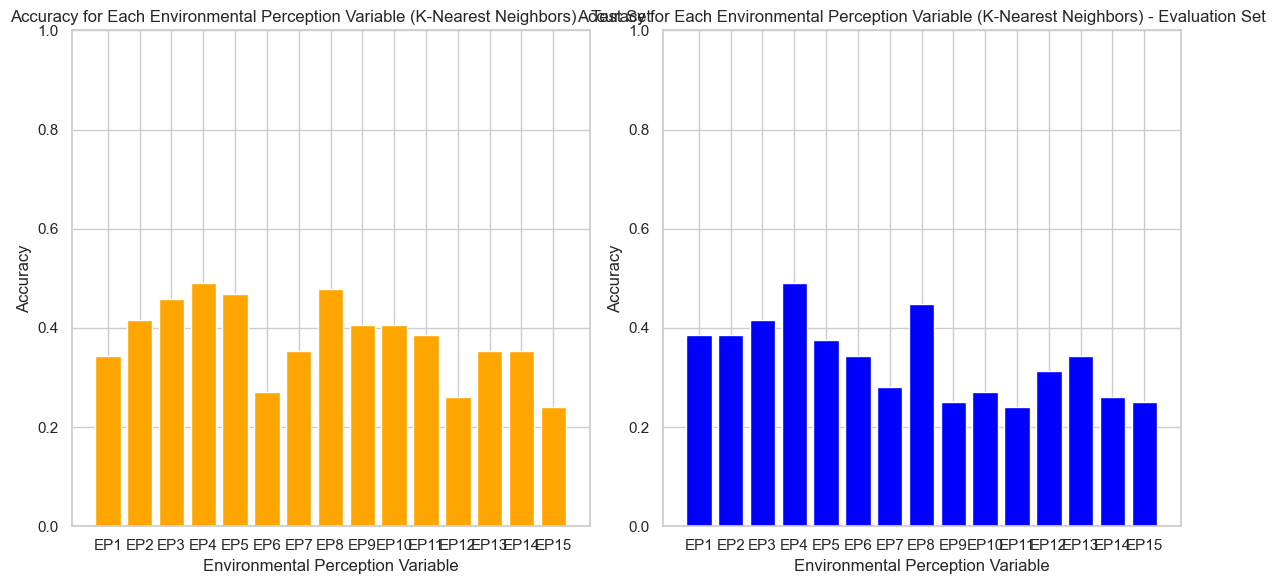

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = socio_demo_features_subset

# Add cluster information to the features
X['cluster'] = cluster_df['cluster']

y = environmental_perception

X_encoded = pd.get_dummies(X)

# Data splitting
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize lists to store accuracies and variable names
accuracies = []
variable_names = []

# Model selection and training (KNeighborsClassifier)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Model evaluation on the test set
y_pred_test = knn_model.predict(X_test)

# Evaluate each variable separately on the test set and store accuracies and variable names
for i in range(y_test.shape[1]):
    variable_name = f"EP{i+1}"

    # Calculate accuracy for each target variable on the test set
    accuracy_test = accuracy_score(y_test.iloc[:, i], y_pred_test[:, i])

    variable_names.append(variable_name)
    accuracies.append(accuracy_test)

    # Print classification report for the test set
    print(f"Classification Report for {variable_name} on Test Set:\n", classification_report(y_test.iloc[:, i], y_pred_test[:, i]))
    print("\n")

    # Print accuracy for the test set
    print(f"Accuracy for {variable_name} on Test Set: {accuracy_test:.2%}")
    print("\n")

# Model evaluation on the evaluation set
y_pred_eval = knn_model.predict(X_eval)

# Evaluate each variable separately on the evaluation set and store accuracies and variable names
for i in range(y_eval.shape[1]):
    variable_name = f"EP{i+1}"

    # Calculate accuracy for each target variable on the evaluation set
    accuracy_eval = accuracy_score(y_eval.iloc[:, i], y_pred_eval[:, i])

    # Print classification report for the evaluation set
    print(f"Classification Report for {variable_name} on Evaluation Set:\n", classification_report(y_eval.iloc[:, i], y_pred_eval[:, i]))
    print("\n")

    # Print accuracy for the evaluation set
    print(f"Accuracy for {variable_name} on Evaluation Set: {accuracy_eval:.2%}")
    print("\n")

# Calculate and print the average accuracy for the test set
average_accuracy_test = np.mean(accuracies)
print(f"Average Accuracy Across All Variables on Test Set: {average_accuracy_test:.2%}")

# Create a bar plot for the test set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(variable_names, accuracies, color='orange')
plt.title('Accuracy for Each Environmental Perception Variable (K-Nearest Neighbors) - Test Set')
plt.xlabel('Environmental Perception Variable')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to ensure accurate representation of accuracy values

# Plot for the evaluation set
plt.subplot(1, 2, 2)
accuracies_eval = []
for i in range(y_eval.shape[1]):
    variable_name = f"EP{i+1}"
    accuracy_eval = accuracy_score(y_eval.iloc[:, i], y_pred_eval[:, i])
    accuracies_eval.append(accuracy_eval)
plt.bar(variable_names, accuracies_eval, color='blue')
plt.title('Accuracy for Each Environmental Perception Variable (K-Nearest Neighbors) - Evaluation Set')
plt.xlabel('Environmental Perception Variable')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

average_accuracy_eval = np.mean(accuracies_eval)
print(f"Average Accuracy Across All Variables on Evaluation Set: {average_accuracy_eval:.2%}")

plt.tight_layout()
plt.show()

Classification Report for EP1 on Test Set:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           3       0.25      0.23      0.24        26
           4       0.40      0.47      0.43        40
           5       0.46      0.27      0.34        22

    accuracy                           0.32        96
   macro avg       0.22      0.20      0.20        96
weighted avg       0.34      0.32      0.32        96



Accuracy for EP1 on Test Set: 32.29%


Classification Report for EP2 on Test Set:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.33      0.11      0.17         9
           3       0.13      0.18      0.15        11
           4       0.44      0.64      0.52        36
           5       0.31      0.21      0.25        39

    accuracy                           0.35        96
  

/Users/mohitaparwani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohitaparwani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohitaparwani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Use

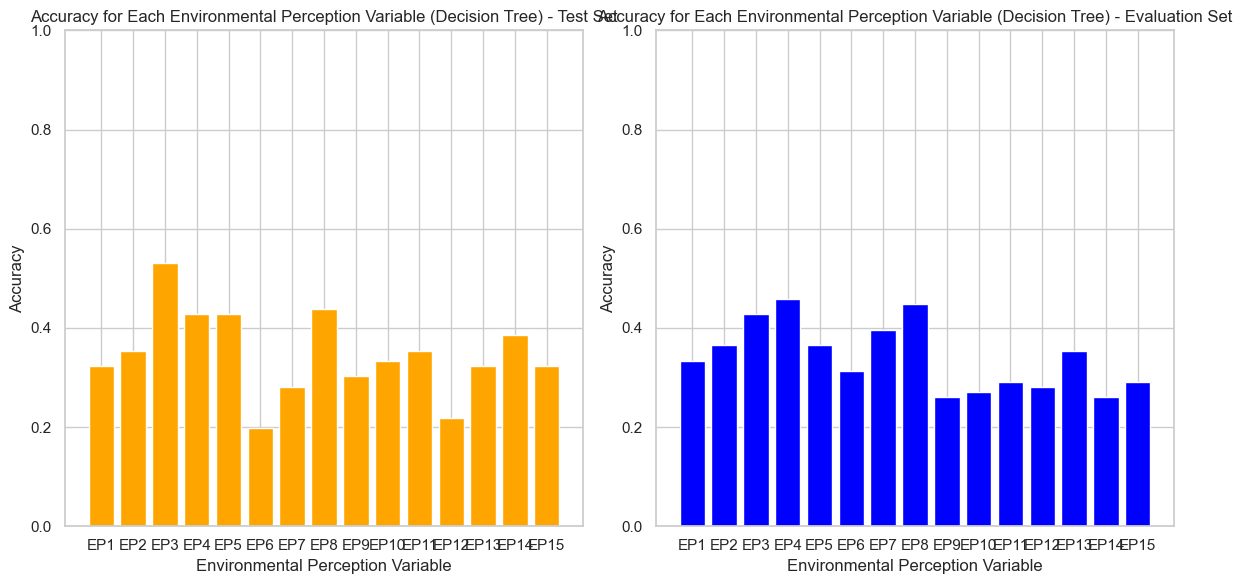

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np


X = socio_demo_features_subset

# Add cluster information to the features
X['cluster'] = cluster_df['cluster']

y = environmental_perception

X_encoded = pd.get_dummies(X)

# Data splitting
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize lists to store accuracies and variable names
accuracies = []
variable_names = []

# Model selection and training (DecisionTreeClassifier)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Model evaluation on the test set
y_pred_test = dt_model.predict(X_test)

# Evaluate each variable separately on the test set and store accuracies and variable names
for i in range(y_test.shape[1]):
    variable_name = f"EP{i+1}"

    # Calculate accuracy for each target variable on the test set
    accuracy_test = accuracy_score(y_test.iloc[:, i], y_pred_test[:, i])

    variable_names.append(variable_name)
    accuracies.append(accuracy_test)

    # Print classification report for the test set
    print(f"Classification Report for {variable_name} on Test Set:\n", classification_report(y_test.iloc[:, i], y_pred_test[:, i]))
    print("\n")

    # Print accuracy for the test set
    print(f"Accuracy for {variable_name} on Test Set: {accuracy_test:.2%}")
    print("\n")

# Model evaluation on the evaluation set
y_pred_eval = dt_model.predict(X_eval)

# Evaluate each variable separately on the evaluation set and store accuracies and variable names
for i in range(y_eval.shape[1]):
    variable_name = f"EP{i+1}"

    # Calculate accuracy for each target variable on the evaluation set
    accuracy_eval = accuracy_score(y_eval.iloc[:, i], y_pred_eval[:, i])

    # Print classification report for the evaluation set
    print(f"Classification Report for {variable_name} on Evaluation Set:\n", classification_report(y_eval.iloc[:, i], y_pred_eval[:, i]))
    print("\n")

    # Print accuracy for the evaluation set
    print(f"Accuracy for {variable_name} on Evaluation Set: {accuracy_eval:.2%}")
    print("\n")

# Calculate and print the average accuracy for the test set
average_accuracy_test = np.mean(accuracies)
print(f"Average Accuracy Across All Variables on Test Set: {average_accuracy_test:.2%}")

# Create a bar plot for the test set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(variable_names, accuracies, color='orange')
plt.title('Accuracy for Each Environmental Perception Variable (Decision Tree) - Test Set')
plt.xlabel('Environmental Perception Variable')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Plot for the evaluation set
plt.subplot(1, 2, 2)
accuracies_eval = []
for i in range(y_eval.shape[1]):
    variable_name = f"EP{i+1}"
    accuracy_eval = accuracy_score(y_eval.iloc[:, i], y_pred_eval[:, i])
    accuracies_eval.append(accuracy_eval)
plt.bar(variable_names, accuracies_eval, color='blue')
plt.title('Accuracy for Each Environmental Perception Variable (Decision Tree) - Evaluation Set')
plt.xlabel('Environmental Perception Variable')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

average_accuracy_eval = np.mean(accuracies_eval)
print(f"Average Accuracy Across All Variables on Evaluation Set: {average_accuracy_eval:.2%}")

plt.tight_layout()
plt.show()


/Users/mohitaparwani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohitaparwani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohitaparwani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Use

Classification Report for EP1 on Test Set:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           3       0.27      0.23      0.25        26
           4       0.45      0.62      0.52        40
           5       0.27      0.18      0.22        22

    accuracy                           0.36        96
   macro avg       0.20      0.21      0.20        96
weighted avg       0.32      0.36      0.33        96



Accuracy for EP1 on Test Set: 36.46%


Classification Report for EP2 on Test Set:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         9
           3       0.20      0.18      0.19        11
           4       0.38      0.53      0.44        36
           5       0.36      0.31      0.33        39

    accuracy                           0.34        96
  

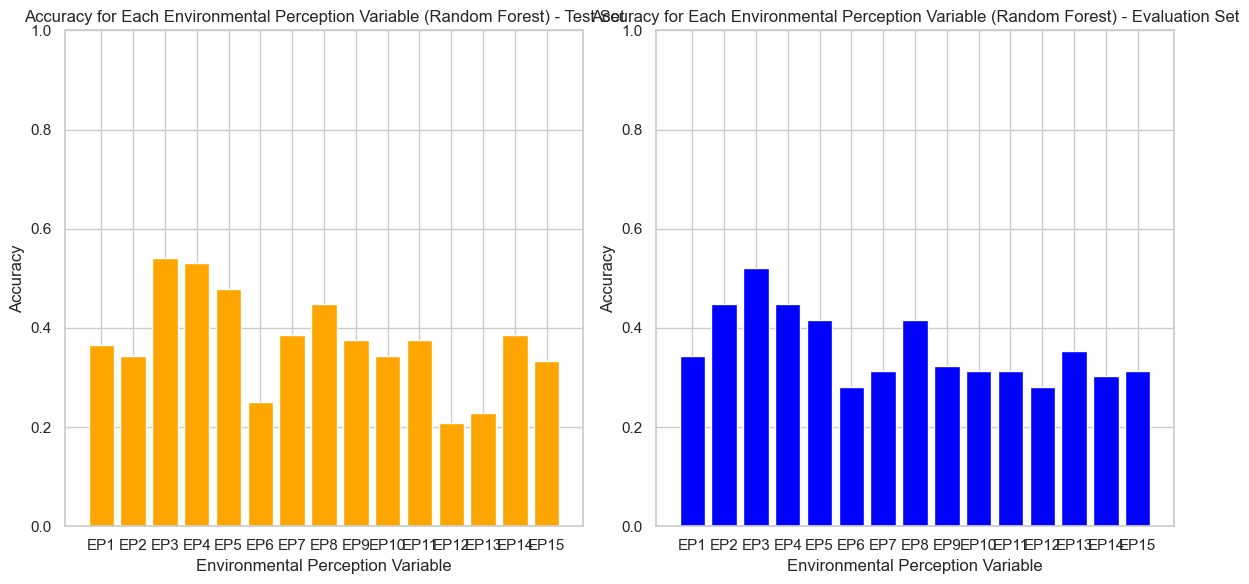

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

X = socio_demo_features_subset

# Add cluster information to the features
X['cluster'] = cluster_df['cluster']

y = environmental_perception

X_encoded = pd.get_dummies(X)

# Data splitting
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize lists to store accuracies and variable names
accuracies = []
variable_names = []

# Model selection and training (RandomForestClassifier)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Model evaluation on the test set
y_pred_test = rf_model.predict(X_test)

# Evaluate each variable separately on the test set and store accuracies and variable names
for i in range(y_test.shape[1]):
    variable_name = f"EP{i+1}"

    # Calculate accuracy for each target variable on the test set
    accuracy_test = accuracy_score(y_test.iloc[:, i], y_pred_test[:, i])

    variable_names.append(variable_name)
    accuracies.append(accuracy_test)

    # Print classification report for the test set
    print(f"Classification Report for {variable_name} on Test Set:\n", classification_report(y_test.iloc[:, i], y_pred_test[:, i]))
    print("\n")

    # Print accuracy for the test set
    print(f"Accuracy for {variable_name} on Test Set: {accuracy_test:.2%}")
    print("\n")

# Model evaluation on the evaluation set
y_pred_eval = rf_model.predict(X_eval)

# Evaluate each variable separately on the evaluation set and store accuracies and variable names
for i in range(y_eval.shape[1]):
    variable_name = f"EP{i+1}"

    # Calculate accuracy for each target variable on the evaluation set
    accuracy_eval = accuracy_score(y_eval.iloc[:, i], y_pred_eval[:, i])

    # Print classification report for the evaluation set
    print(f"Classification Report for {variable_name} on Evaluation Set:\n", classification_report(y_eval.iloc[:, i], y_pred_eval[:, i]))
    print("\n")

    # Print accuracy for the evaluation set
    print(f"Accuracy for {variable_name} on Evaluation Set: {accuracy_eval:.2%}")
    print("\n")

# Calculate and print the average accuracy for the test set
average_accuracy_test = np.mean(accuracies)
print(f"Average Accuracy Across All Variables on Test Set: {average_accuracy_test:.2%}")

#bar plot for the test set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(variable_names, accuracies, color='orange')
plt.title('Accuracy for Each Environmental Perception Variable (Random Forest) - Test Set')
plt.xlabel('Environmental Perception Variable')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Plot for the evaluation set
plt.subplot(1, 2, 2)
accuracies_eval = []
for i in range(y_eval.shape[1]):
    variable_name = f"EP{i+1}"
    accuracy_eval = accuracy_score(y_eval.iloc[:, i], y_pred_eval[:, i])
    accuracies_eval.append(accuracy_eval)
plt.bar(variable_names, accuracies_eval, color='blue')
plt.title('Accuracy for Each Environmental Perception Variable (Random Forest) - Evaluation Set')
plt.xlabel('Environmental Perception Variable')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

average_accuracy_eval = np.mean(accuracies_eval)
print(f"Average Accuracy Across All Variables on Evaluation Set: {average_accuracy_eval:.2%}")

plt.tight_layout()
plt.show()


/Users/mohitaparwani/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mohitaparwani/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Classification Report for EP1 on Test Set:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           3       0.50      0.19      0.28        26
           4       0.43      0.80      0.56        40
           5       0.17      0.09      0.12        22

    accuracy                           0.41        96
   macro avg       0.22      0.22      0.19        96
weighted avg       0.35      0.41      0.34        96



Accuracy for EP1 on Test Set: 40.62%


Classification Report for EP2 on Test Set:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        11
           4       0.39      0.72      0.50        36
           5       0.46      0.33      0.39        39

    accuracy                           0.41        96
  

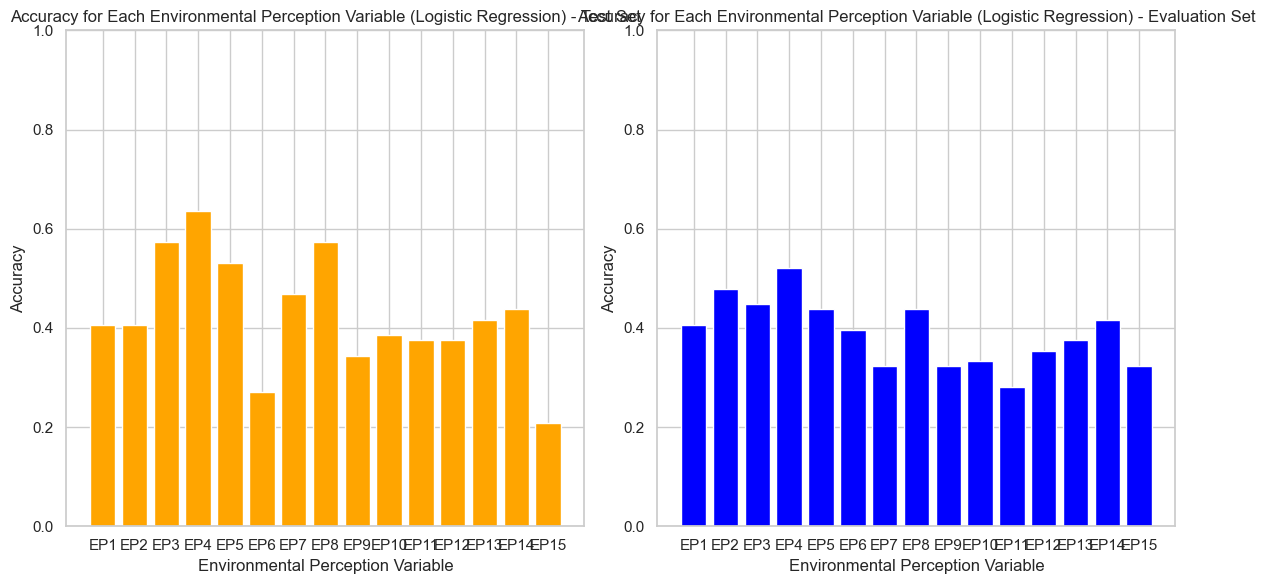

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np


X = socio_demo_features_subset

y = environmental_perception

X_encoded = pd.get_dummies(X)

# Data splitting
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize lists to store accuracies and variable names
accuracies = []
variable_names = []

# Model selection and training (MultiOutputClassifier with Logistic Regression)
logreg_model = MultiOutputClassifier(LogisticRegression(random_state=42))
logreg_model.fit(X_train, y_train)

# Model evaluation on the test set
y_pred_test = logreg_model.predict(X_test)

# Evaluate each variable separately on the test set and store accuracies and variable names
for i in range(y_test.shape[1]):
    variable_name = f"EP{i+1}"

    # Calculate accuracy for each target variable on the test set
    accuracy_test = accuracy_score(y_test.iloc[:, i], y_pred_test[:, i])

    variable_names.append(variable_name)
    accuracies.append(accuracy_test)

    # Print classification report for the test set
    print(f"Classification Report for {variable_name} on Test Set:\n", classification_report(y_test.iloc[:, i], y_pred_test[:, i]))
    print("\n")

    # Print accuracy for the test set
    print(f"Accuracy for {variable_name} on Test Set: {accuracy_test:.2%}")
    print("\n")

# Model evaluation on the evaluation set
y_pred_eval = logreg_model.predict(X_eval)

# Evaluate each variable separately on the evaluation set and store accuracies and variable names
for i in range(y_eval.shape[1]):
    variable_name = f"EP{i+1}"

    # Calculate accuracy for each target variable on the evaluation set
    accuracy_eval = accuracy_score(y_eval.iloc[:, i], y_pred_eval[:, i])

    # Print classification report for the evaluation set
    print(f"Classification Report for {variable_name} on Evaluation Set:\n", classification_report(y_eval.iloc[:, i], y_pred_eval[:, i]))
    print("\n")

    # Print accuracy for the evaluation set
    print(f"Accuracy for {variable_name} on Evaluation Set: {accuracy_eval:.2%}")
    print("\n")

# Calculate and print the average accuracy for the test set
average_accuracy_test = np.mean(accuracies)
print(f"Average Accuracy Across All Variables on Test Set: {average_accuracy_test:.2%}")

#Bar plot for the test set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(variable_names, accuracies, color='orange')
plt.title('Accuracy for Each Environmental Perception Variable (Logistic Regression) - Test Set')
plt.xlabel('Environmental Perception Variable')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Plot for the evaluation set
plt.subplot(1, 2, 2)
accuracies_eval = []
for i in range(y_eval.shape[1]):
    variable_name = f"EP{i+1}"
    accuracy_eval = accuracy_score(y_eval.iloc[:, i], y_pred_eval[:, i])
    accuracies_eval.append(accuracy_eval)
plt.bar(variable_names, accuracies_eval, color='blue')
plt.title('Accuracy for Each Environmental Perception Variable (Logistic Regression) - Evaluation Set')
plt.xlabel('Environmental Perception Variable')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
average_accuracy_eval = np.mean(accuracies_eval)
print(f"Average Accuracy Across All Variables on Evaluation Set: {average_accuracy_eval:.2%}")

plt.tight_layout()
plt.show()
